# Logistic Regression From Scratch in Numpy

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd

##  load the dataset and appropriate libraries in Python

In [2]:
# Then, loading the dataset is a one-liner:
iris = datasets.load_iris()

In [3]:
# This function returns a dictionary we call iris, which contains a bunch of different fields:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
# Here, all the data points are contained in 'data'. There are 150 data points, each of which has four feature values:
iris.data.shape

(150, 4)

In [5]:
# These four features correspond to the sepal and petal dimensions mentioned earlier:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
X = iris.data
y = iris.target

In [8]:
# Making a Data Frame
df = pd.DataFrame(X, columns = ['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)'])

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['species id'] = y

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## labeling our features the appropriate name.

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [14]:
df['species_name'] = df['species id'].map(species_map)

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species id,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Randomization our dataset.

In [16]:
perm = np.random.permutation(len(X))
perm

array([ 40,  79,  61,  93,  18,  76,  91, 113,  65, 125,  20, 132,  29,
         5,  22, 121,   0, 106,   9,  58, 145, 142,  51, 119, 136, 100,
        63,  21, 138,  14,  92,  53,  33, 111, 122,  86, 120,  95,   7,
        46, 105,  30,  67, 131,  17, 124,  43,   8, 123,  81, 103,  59,
        42,  78,  70,  28,  68,  38, 148,  15, 143,  62, 126, 144,  27,
        97, 149,  94, 114, 117,  10,  49,  56, 129,  64,  55,   6, 102,
        32, 147,  26,  25, 137, 112,  89,  54,  24, 133,  74, 134, 130,
        34,  75,  90, 118, 104, 127,  84, 140,  47,  66, 108,  98, 128,
        13,  77, 139,  60,  44, 110, 101,  16,  73,  85, 135,  69,  36,
        99,   1,  39,  35,  31, 141,  83,  12,  80,   2,  48, 146,  19,
        23,  71,  50,  11,  57, 116,  87,  88,  82,  52,  72,   4, 107,
        41, 109,  45,  37,   3,  96, 115])

In [17]:
df = df.loc[perm]

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species id,species_name
40,5.0,3.5,1.3,0.3,0,setosa
79,5.7,2.6,3.5,1.0,1,versicolor
61,5.9,3.0,4.2,1.5,1,versicolor
93,5.0,2.3,3.3,1.0,1,versicolor
18,5.7,3.8,1.7,0.3,0,setosa


## Statistics of each individual species

In [19]:
setosa_mask = df['species_name'] == 'setosa'
df[setosa_mask].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species id
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


In [20]:
virginica_mask = df['species_name'] == 'virginica'
df[virginica_mask].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species id
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


In [21]:
versicolor_mask = df['species_name'] == 'versicolor'
df[versicolor_mask].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species id
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


Given this information we see that Setosa is much smaller in sepal length and petal_width when compared to the other 2 species. We can also see that it has a larger sepal_width on average. Let’s go ahead and use sepal length and petal_width to make a scatter plot and see if these features will work for separating our classes.

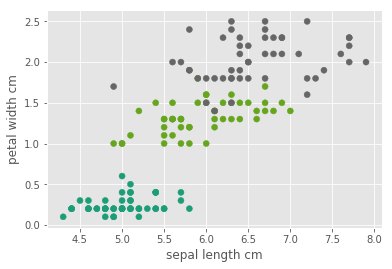

In [22]:
plt.scatter(X[:,0], X[:,3], c = y, cmap = 'Dark2')
plt.xlabel('sepal length cm')
plt.ylabel('petal width cm')
plt.show()

In [23]:
names = iris['target_names']
feature_names = iris['feature_names']

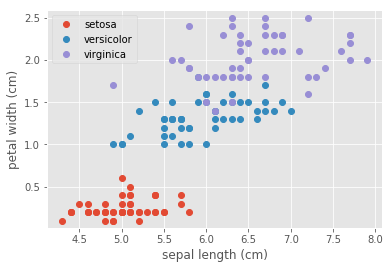

In [24]:
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

## Binary predicting Setosa or not Setosa

In [25]:
X = np.c_[X[:,0], X[:,3]]

In [27]:
X.shape

(150, 2)

In [29]:
y = []

for i in range(len(X)):
    if i < 50:
        y.append(1)
    else:
        y.append(0)

In [30]:
len(y)

150

In [33]:
y = np.array(y)

In [34]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

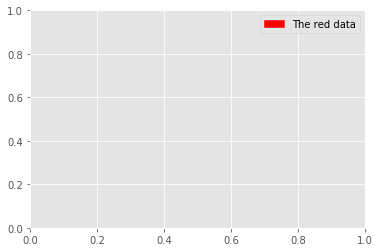

In [39]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])

plt.show()

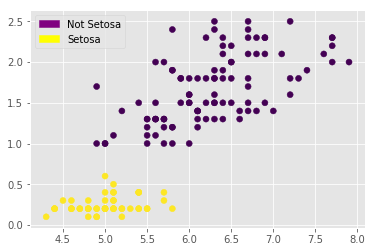

In [50]:
plt.scatter(X[:,0], X[:,1], c = y)

purple_patch = mpatches.Patch(color='purple', label='Not Setosa')

red_patch = mpatches.Patch(color='yellow', label='Setosa')

plt.legend(handles=[purple_patch,red_patch])

plt.show()

## Split the data to train/test set

In [51]:
x_train, x_test = X[perm][20:], X[perm][:20]
y_train, y_test = y[perm][20:], y[perm][:20]

In [52]:
x_train.shape,  x_test.shape, y_train.shape, y_test.shape

((130, 2), (20, 2), (130,), (20,))

##  reshape our labels using the reshape function to attain a rank 1 column vector

This will be required in order for python’s broadcasting to compute the correct values once we start calculating our linear algebra.

In [55]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [56]:
x_train.shape,  x_test.shape, y_train.shape, y_test.shape

((130, 2), (20, 2), (130, 1), (20, 1))

## Sigmoind function

In [57]:
def sigmoid(Z):
    return 1/(1 + np.e**(-Z))

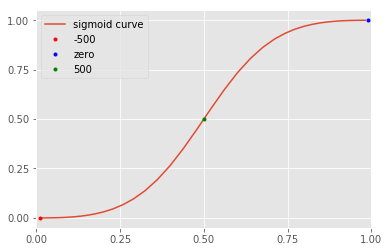

In [70]:
fig, ax = plt.subplots()
plt.plot(sigmoid(np.linspace(-4,4)), sigmoid(np.linspace(-10,10)))
plt.xlim(0,1)
ax.plot(0.01, sigmoid(-500), 'r.')
ax.plot(0.99, sigmoid(500), 'b.')
ax.plot(0.5, sigmoid(0), 'g.')
plt.xticks([0,0.25,0.5,0.75,1])
plt.yticks([0,0.25,0.5,0.75,1])
ax.legend(['sigmoid curve','-500','zero','500'])
plt.show()

As values get larger and larger the sigmoid predicts values closer and closer to 1. As negative values become larger and larger the sigmoid function predicts closer and closer to 0 asymptotically. Given a 0, the sigmoid function outputs 0.5. Now we will discuss the Logistic Regression cost function.

$$ J ( \theta ) = - \frac { 1 } { m } \sum _ { i = 1 } ^ { m } \left[ y ^ { ( i ) } \log \left( h _ { \theta } \left( x ^ { ( i ) } \right) \right) + \left( 1 - y ^ { ( i ) } \right) \log \left( 1 - h _ { \theta } \left( x ^ { ( i ) } \right) \right) \right] $$

The logistic loss function is well suited for logistic regression because it’s convex. Imagine the loss function as a bowl floating above the data points and the goal is to get to the bottom of the bowl. If the true y value = 0, the left half of the formula cancels out. If the true y value = 1, the right half of the formula cancels. The term y_hat is used for our models prediction of the best value. Therefore we are averaging the loss between our predictions and the true y values. 

In [71]:
def logistic_loss(y,y_hat):
    return -np.mean(y * np.log(y_hat) + (1-y) * np.log(1 - y_hat))

## minimize our loss function

###  1. Initialize Weights

In [72]:
W = np.zeros((2,1))
b = np.zeros((1,1))
learning_rate = 0.01

W = Weights, b = Bias and learning_rate is how big of “steps” we will take down the slope. Since I will be using 2 feature variables, we make the W matrix of shape 2x1, one for each feature. Bias is a 1x1 matrix as there is only one bias for each example.

### 2. Write training procedure.

In [75]:
m = len(y_train)

for epoch in range(5000):
    Z = np.matmul(x_train, W) + b
    A = sigmoid(Z)
    loss = logistic_loss(y_train, A)
    dz = A - y_train
    dw = 1/m * np.matmul(x_train.T, dz)
    db = np.sum(dz)
    
    W = W - learning_rate * dw
    b = b - learning_rate * db
    
    if epoch % 100 == 0:
        print(loss)

0.6931471805599453
0.49611016759454746
0.4133271285925814
0.35559327847556077
0.3135200885099163
0.2816251479796909
0.2566289005803136
0.23649336945636085
0.21990091070037854
0.20596760046446805
0.19408060677272995
0.18380254759628323
0.17481322586986328
0.16687294818465143
0.1597987288538218
0.15344842915782042
0.14770992459874874
0.14249354190111005
0.13772667312847173
0.13334987082678143
0.12931397051943308
0.12557793864518668
0.12210724115238517
0.1188725913847458
0.11584897808772576
0.11301490292225312
0.11035177651112141
0.10784343574876934
0.10547575480176698
0.10323632917559476
0.10111421726165101
0.09909972747258887
0.09718424181093842
0.09536006876341756
0.0936203199591076
0.09195880620676347
0.09036994943017485
0.08884870771954663
0.08739051126156808
0.08599120733819121
0.08464701292160207
0.08335447366100009
0.08211042827108977
0.08091197750441438
0.07975645702880368
0.07864141364420364
0.07756458436535554
0.07652387797237496
0.07551735869351127
0.07454323173583076


Ok, this will take some detailed explanation. m = len(y_train) will just be used in averaging over the dataset. m = 120 in our case. We create a for loop which will run for 5000 iterations or “epochs”. First, we compute Z which is a linear equation multiplying our training examples times our W matrix then add the bias. Next, we pass this new 1x150 matrix to our sigmoid function which results in a new 1x150 matrix A. We then compute the loss with our logistic loss function. We are now complete our “forward pass”. Now in order to minimize our loss function we must use back propagation which involves some tricky calculus which is beyond the scope of this article. To summarize we will be computing the derivatives of Z, W, and B with respect to our loss function. Think of this like, “If we make a small nudge to Z, how much does this effect the loss function”. So we are effectively finding the slope of each variable which will provide the greatest decrease of the loss function. dz = derivate of Z, dw = derivative of W and db is the derivative of b. Finally comes the gradient descent update. W = W - learning_rate * dw and b = b =b -learning_rate * db are applying small changes to our weights/bias until we finally find that there is no derivative (these are the small “steps” down the hill”). Finally we print out our loss function every 100 steps. We should be able to see a steady decline in values eventually bottoming out. Let’s see what we get. ( I changed this to 3000 epochs to keep it small).


As you can see we have a very quick decline and then it begins to “ roll” slower and slower which means its closer to converging to the global optimum. Next step is checking our predictions. First we inspect our weights/bias values. Then we iterate over each value of sigmoid(Z) and if the value is > 0.5 we assign a 1 for setosa and 0 if not.

In [79]:
W, b

(array([[-1.70969939],
        [-3.41590345]]), array([[11.76753339]]))

In [82]:
predictions = []

for i in sigmoid(Z):
    if i > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

In [84]:
Z

array([[-7.54347381],
       [-4.6385701 ],
       [-4.29809612],
       [-3.61424819],
       [-7.20118735],
       [-7.54274882],
       [-3.44364871],
       [ 1.6815858 ],
       [-4.63893259],
       [ 1.16797486],
       [-2.24763982],
       [-2.07631534],
       [ 1.6808608 ],
       [-5.66434199],
       [-8.22840923],
       [-4.81098207],
       [-7.88539778],
       [-2.07667784],
       [ 2.53567072],
       [ 2.36470873],
       [-8.39900872],
       [ 2.87759468],
       [-1.56451689],
       [-8.5703332 ],
       [ 2.02314727],
       [-6.86035088],
       [ 1.16942485],
       [ 3.56144261],
       [-5.15181854],
       [-1.05163094],
       [-5.15181854],
       [-1.90499086],
       [ 3.56144261],
       [-3.61424819],
       [-4.46797061],
       [ 2.19374675],
       [-3.95617216],
       [ 3.56144261],
       [-6.6886639 ],
       [ 0.6558139 ],
       [-7.71443579],
       [-1.90644085],
       [-4.98085656],
       [-8.22659675],
       [ 2.19374675],
       [-3

In [83]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0]

In [85]:
from sklearn.metrics import f1_score

In [87]:
f1_score(predictions, y_train)

1.0

We use the f1_score which is a combination of precision and recall to find we have a score of 1.0 Simply using accuracy_score in this case would not be the best idea due to the imbalanced classes. Finally lets plot our results in a scatter plot.

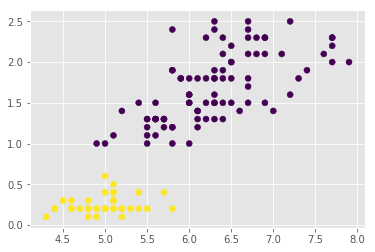

In [89]:
plt.scatter(x_train[:,0], x_train[:,1], c = y_train.ravel())

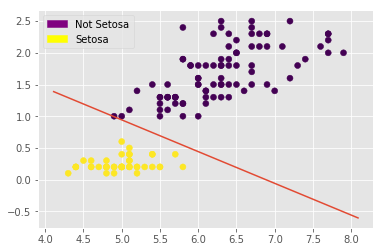

In [92]:
plt.scatter(x_train[:,0], x_train[:,1], c = y_train.ravel())

ax = plt.gca()

xval = np.array(ax.get_xlim()).reshape(-1,1)

yval = -(xval * W[0][0] + b)/W[1][0]

purple_patch = mpatches.Patch(color='purple', label='Not Setosa')

red_patch = mpatches.Patch(color='yellow', label='Setosa')

plt.legend(handles=[purple_patch,red_patch])

plt.plot(xval,yval)

plt.show()